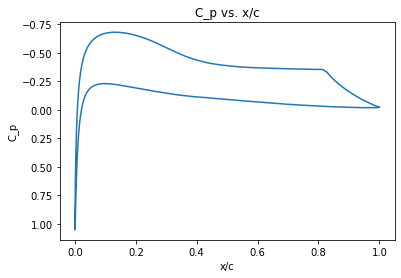

0.3185782429024987
-0.0528054644578336


In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np

path = "C:\\Users\\benja\\Desktop\\Visual Studio Projects\\301_Hw's"
os.chdir(path)

# Load in files
# Path to the .txt file with pressure data in it. Place in the same folder as this script for no change
cp_filename = './airfoil_pressure_data.txt'

x_dim = []
p_dim = []

with open(cp_filename) as f:
    for line in f:
        x, p = line.strip().split('\t')  # assuming the data file is tab separated
        x_dim.append(float(x))
        p_dim.append(float(p))
# Plot C_p
C_p = []
q_infinity = 137.8125
for i in p_dim:
    C_p.append(float((i - 101.3*10**3) / q_infinity))
# Getting x/c list
x_c = []
for i in x_dim:
    x_c.append(float(i/.45))

# plotting x/c vs. C_p
# getting weird values greater than +1
plt.plot(x_c, C_p)
plt.gca().invert_yaxis()
plt.title('C_p vs. x/c')
plt.xlabel('x/c')
plt.ylabel('C_p')
# plt.ylim(bottom=2)
plt.show()

# Calculate c_l
c_l = np.trapz(C_p, x_c, 0.45 / len(C_p))

print(c_l)

# finding c_m

# getting c_p * x_c
C_x = []
k = 0
for i in C_p:
    C_x.append(i * x_c[k])
    k += 1

c_m = .25 * c_l - np.trapz(C_x, x_c, 0.45 / len(C_p))

print(c_m)